                                                Nama                Nama_Toko  \
0  GALAX HOF Tactical M1 White Dual Mode Wireless...  Enter Komputer Official   
1          Fantech ARIA E XD7E Wireless Gaming Mouse  Enter Komputer Official   
2  SteelSeries Aerox 3 Snow Edition Wireless Gami...  Enter Komputer Official   
3  Razer DeathAdder Essential - White - Gaming Mouse  Enter Komputer Official   
4  Logitech G PRO X Superlight 2 Lightspeed Wirel...  Enter Komputer Official   

         Harga banyak_terjual Rating  \
0    Rp943.000              5      5   
1    Rp399.000              -      -   
2  Rp1.750.000              4      5   
3    Rp245.000            80+      5   
4  Rp2.248.000              9    4.8   

                                                Link  \
0  https://www.tokopedia.com/enterkomputer/galax-...   
1  https://www.tokopedia.com/enterkomputer/fantec...   
2  https://www.tokopedia.com/enterkomputer/steels...   
3  https://www.tokopedia.com/enterkomputer/razer

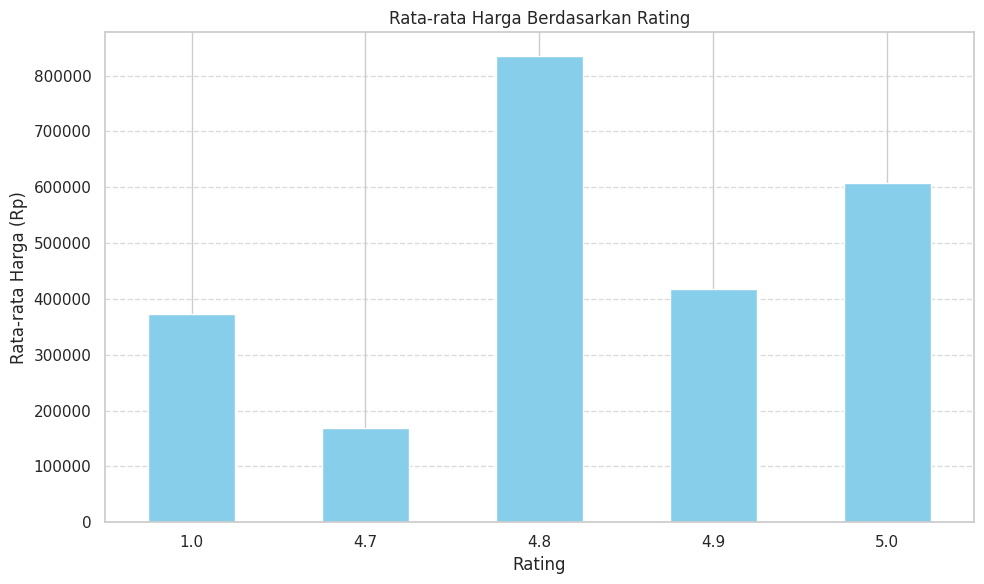

In [9]:
# Langkah 1: Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 2: Load data dari file CSV
file_path = '/content/tokopedia_enterkomputer.csv'  # Sesuaikan jika path berbeda
df = pd.read_csv(file_path)

# Langkah 3: Tampilkan beberapa data awal untuk mengecek struktur
print(df.head())

# Langkah 4: Pastikan kolom harga dan rating dalam format numerik
# Misalnya jika kolom harga mengandung simbol 'Rp' atau titik, kita bersihkan dulu
df['Harga'] = df['Harga'].replace('[Rp. ]', '', regex=True).replace('[.]', '', regex=True)
df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Langkah 5: Drop baris yang tidak memiliki harga atau rating
df = df.dropna(subset=['Harga', 'Rating'])

# Langkah 6: Hitung rata-rata harga berdasarkan rating
mean_price_by_rating = df.groupby('Rating')['Harga'].mean().sort_index()

# Langkah 7: Plot diagram batang
plt.figure(figsize=(10, 6))
mean_price_by_rating.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Harga Berdasarkan Rating')
plt.xlabel('Rating')
plt.ylabel('Rata-rata Harga (Rp)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


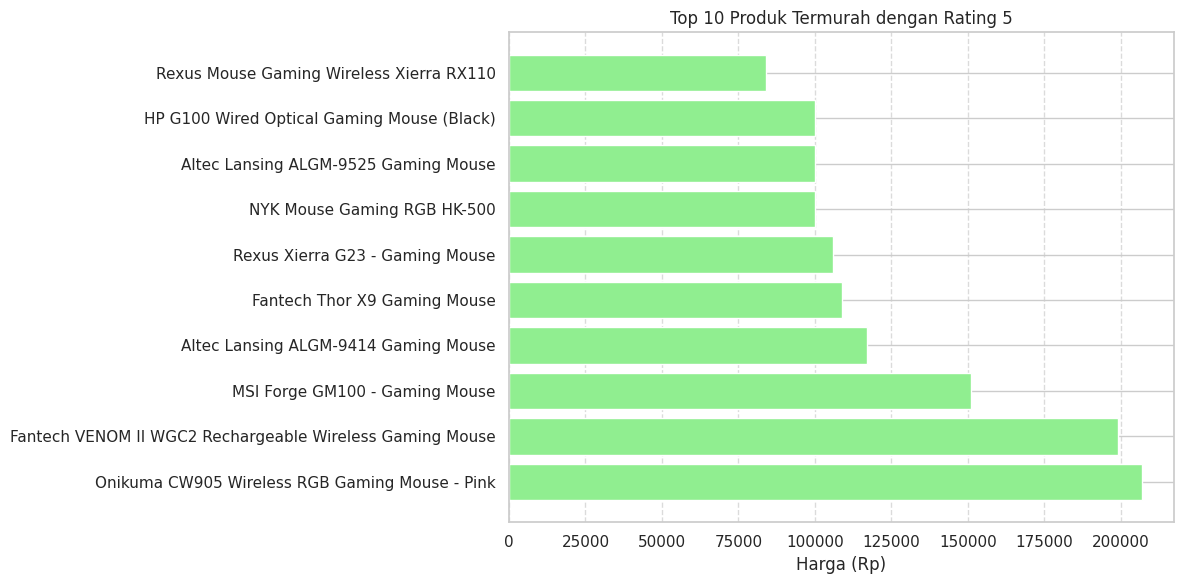

In [11]:
# Langkah 1: Filter data dengan rating 5
rating_5_df = df[df['Rating'] == 5.0]

# Langkah 2: Sortir berdasarkan harga terendah
top10_termurah = rating_5_df.sort_values(by='Harga').head(10)

# Langkah 3: Plot diagram batang
plt.figure(figsize=(12, 6))
plt.barh(top10_termurah['Nama'], top10_termurah['Harga'], color='lightgreen')
plt.xlabel('Harga (Rp)')
plt.title('Top 10 Produk Termurah dengan Rating 5')
plt.gca().invert_yaxis()  # Biar yang termurah di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
